## Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


## Load Dataset

In [60]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
# categorial columns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [62]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
# drop customer id col
df= df.drop(['customerID'],axis=1)

In [65]:
# change totalCharges to numeric datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors ='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [66]:
# display null values rows
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [67]:
# drop rows where tenure is 0
df = df.drop(labels=df[df['tenure']==0].index, axis=0)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

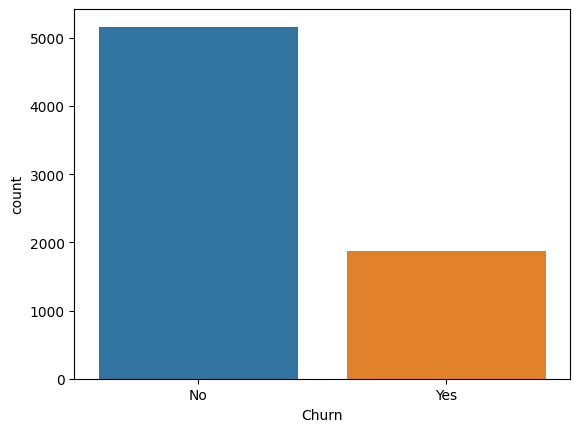

In [68]:
# EDA
sns.countplot(x='Churn',data=df)

**dataset is slightly inbalanced , sggest to use sampling technique to balance the dataset**

<Axes: xlabel='Churn', ylabel='count'>

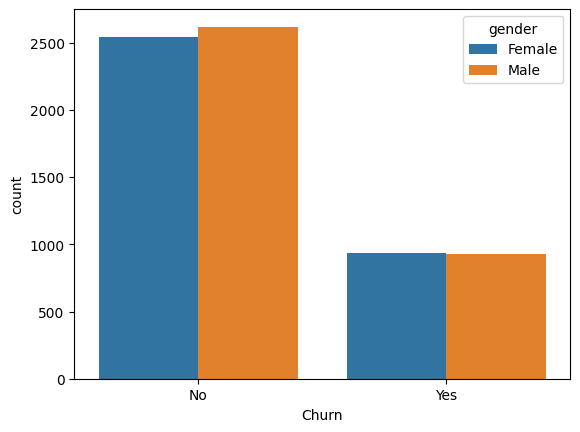

In [69]:
sns.countplot(x='Churn',hue='gender',data=df)

<Axes: xlabel='Churn', ylabel='count'>

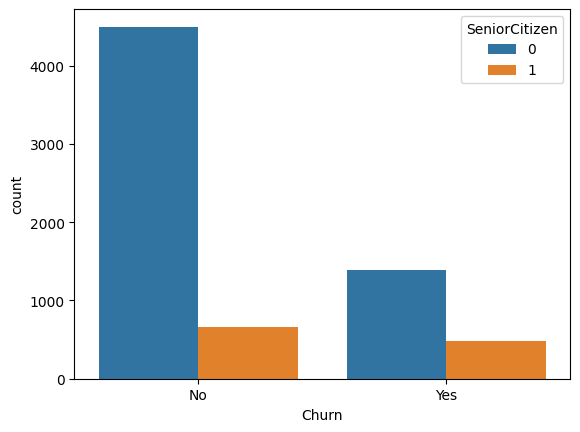

In [70]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=df)

### senior citizen are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

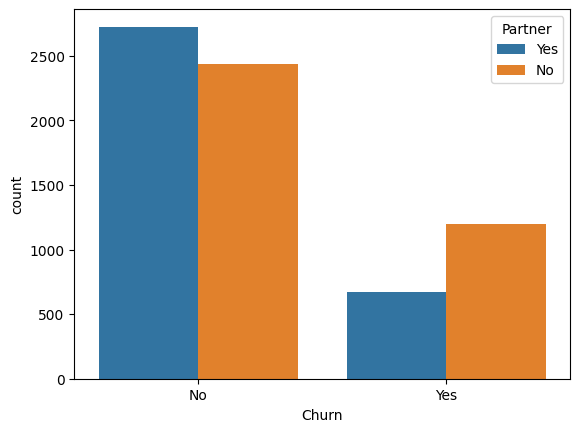

In [71]:
sns.countplot(x='Churn',hue='Partner',data=df)

### People who doesnt have partner or single person more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

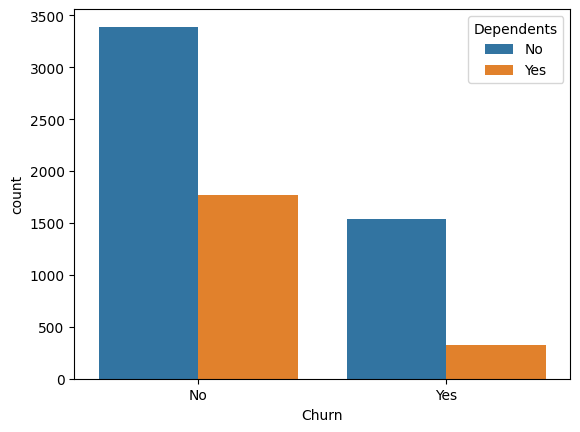

In [72]:
sns.countplot(x='Churn',hue='Dependents',data=df)

## people who doesnt have any dependents or single person more likely to churn 
## if the customer has a family, all of them prefer to use same service and retention is high

<Axes: xlabel='Churn', ylabel='count'>

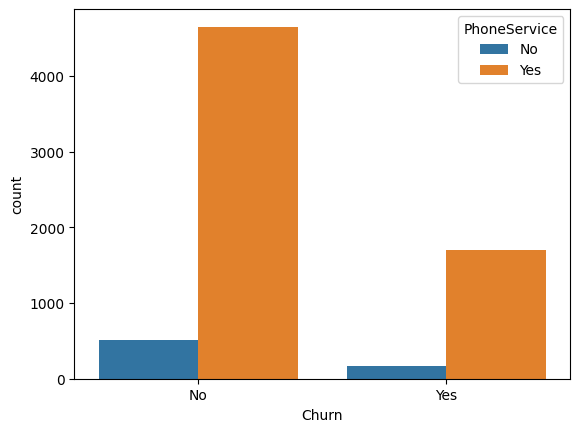

In [73]:
sns.countplot(x='Churn',hue='PhoneService',data=df)

### People who have phone service are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

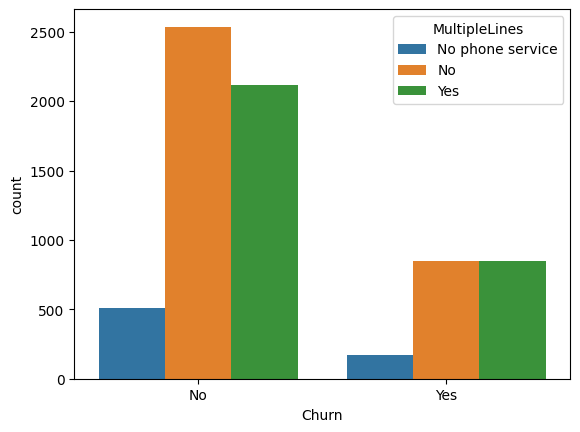

In [74]:
sns.countplot(x='Churn',hue='MultipleLines',data=df)

<Axes: xlabel='Churn', ylabel='count'>

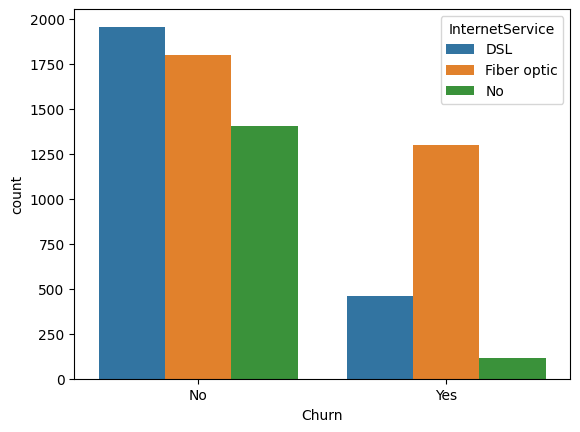

In [75]:
sns.countplot(x='Churn',hue='InternetService',data=df)

### Those have opted forfiber optices are more likely to churn and on the contrary , those have dsl have more retention

<Axes: xlabel='Churn', ylabel='count'>

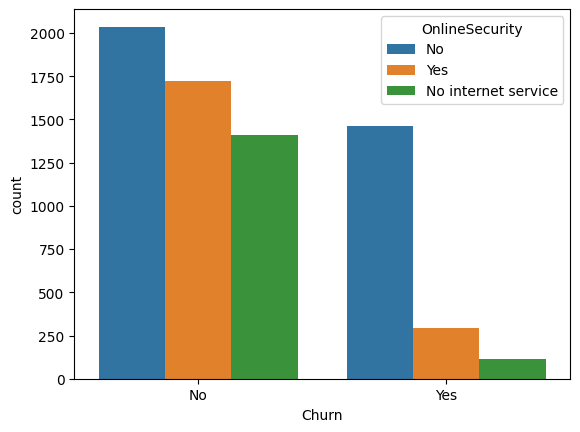

In [76]:
sns.countplot(x='Churn',hue='OnlineSecurity',data=df)

### People who doesnt have online security are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

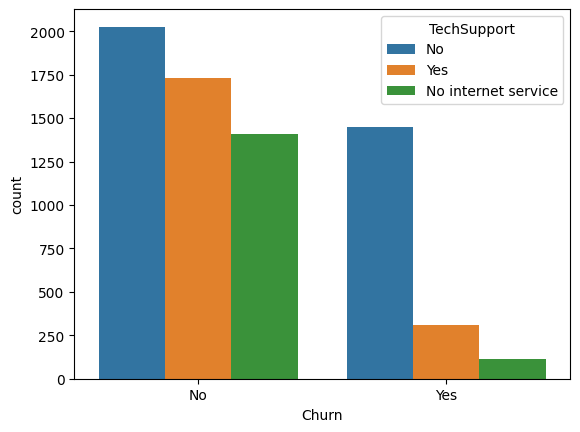

In [77]:
sns.countplot(x='Churn',hue='TechSupport',data=df)

### People who doesnt have tech support are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

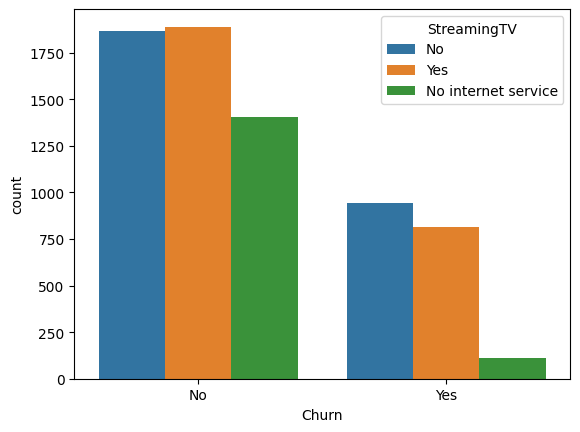

In [78]:
sns.countplot(x='Churn',hue='StreamingTV',data=df)

<Axes: xlabel='Churn', ylabel='count'>

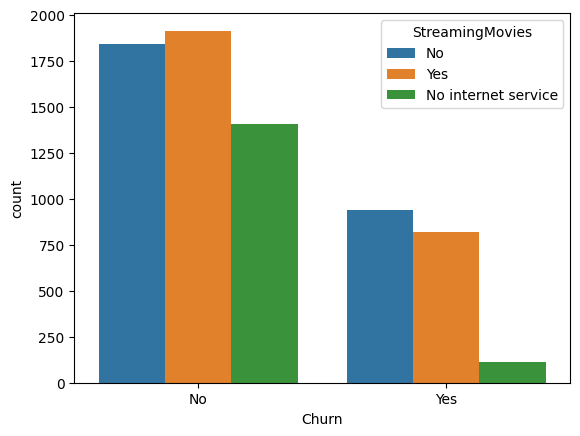

In [79]:
sns.countplot(x='Churn',hue='StreamingMovies',data=df)

<Axes: xlabel='Churn', ylabel='count'>

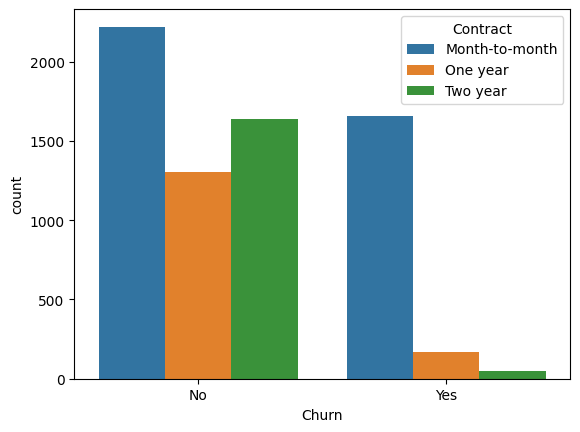

In [80]:
sns.countplot(x='Churn',hue='Contract',data=df)

### If the customer who is on monthly contract are more likely to churn and people on yearly contract less slightly to churn

<Axes: xlabel='Churn', ylabel='count'>

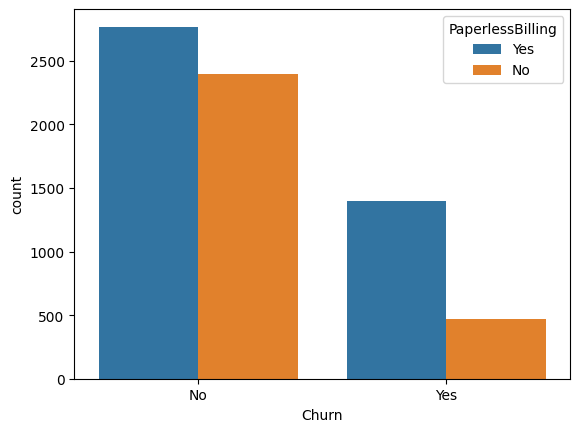

In [81]:
sns.countplot(x='Churn',hue='PaperlessBilling',data=df)

<Axes: xlabel='Churn', ylabel='count'>

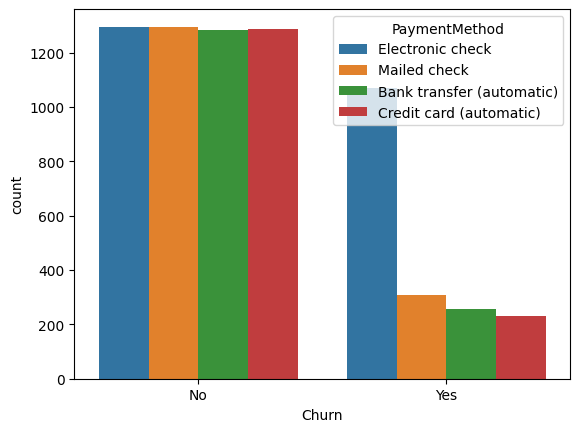

In [82]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df)

### People who have opted for electronic check payment method are more likely to churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

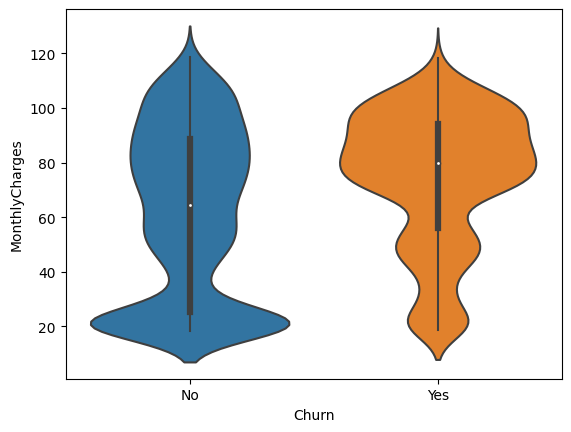

In [83]:
sns.violinplot(x ='Churn', y="MonthlyCharges", data =df)

### People have high monlty charges are more likely to churn

<Axes: xlabel='Churn', ylabel='TotalCharges'>

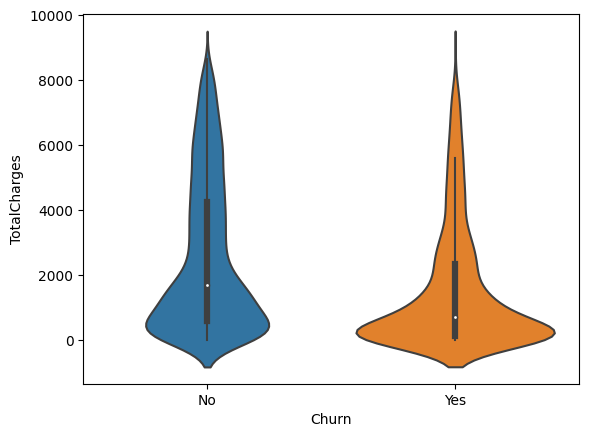

In [84]:
sns.violinplot(x="Churn", y="TotalCharges",data=df)

<Axes: xlabel='Churn', ylabel='tenure'>

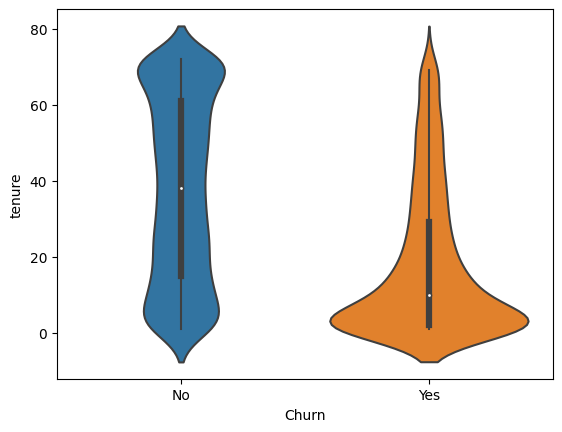

In [85]:
sns.violinplot(x="Churn", y="tenure",data=df)

### People who are on low tenure or who have subscribed for less no. of months are more likely to churn 

<Axes: xlabel='Churn', ylabel='tenure'>

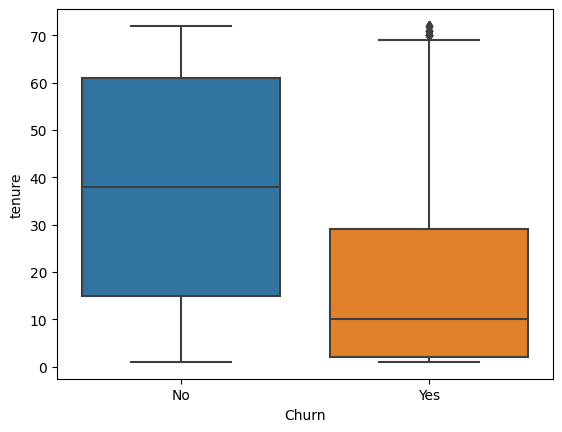

In [86]:
sns.boxplot(x="Churn", y="tenure",data=df)

<Axes: xlabel='TotalCharges', ylabel='Density'>

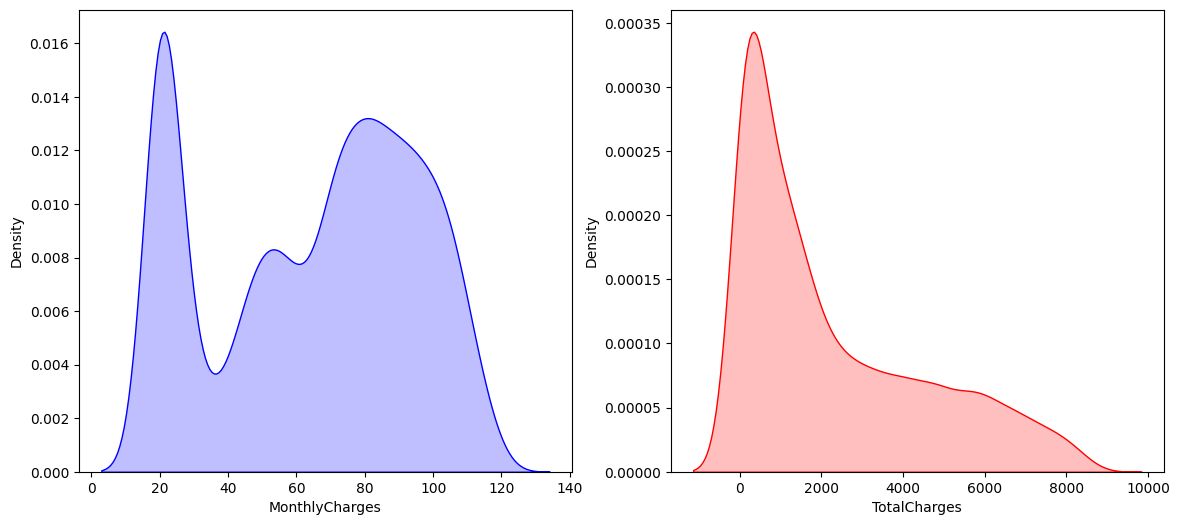

In [87]:
fig,axes = plt.subplots(1,2,figsize=(14,6))
sns.kdeplot(df["MonthlyCharges"],ax=axes[0],color="blue",shade=True)
sns.kdeplot(df["TotalCharges"], ax =axes[1], color="red", shade=True)

### Correlation Matrix

<Axes: >

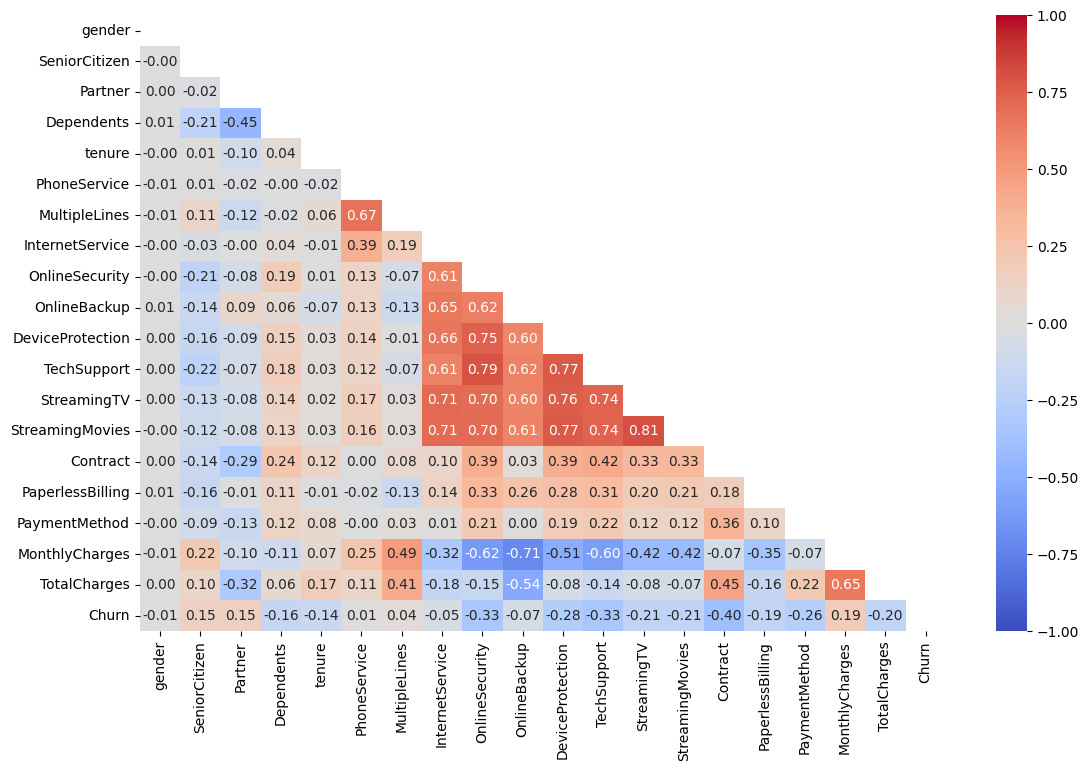

In [88]:
plt.figure(figsize=(13,8))
corr = df.apply(lambda x : pd.factorize(x)[0] if x.dtype!="float64" else x).corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(corr,mask=mask,cmap='coolwarm',vmax=1,vmin=-1,center=0,annot=True,fmt=".2f")

### Label Encoder

In [89]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [90]:
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [96]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

df.head(2)
    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


# Perform log transformation


In [97]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges']+1)
df['TotalCharges'] = np.log(df['TotalCharges']+1)

<Axes: xlabel='TotalCharges', ylabel='Density'>

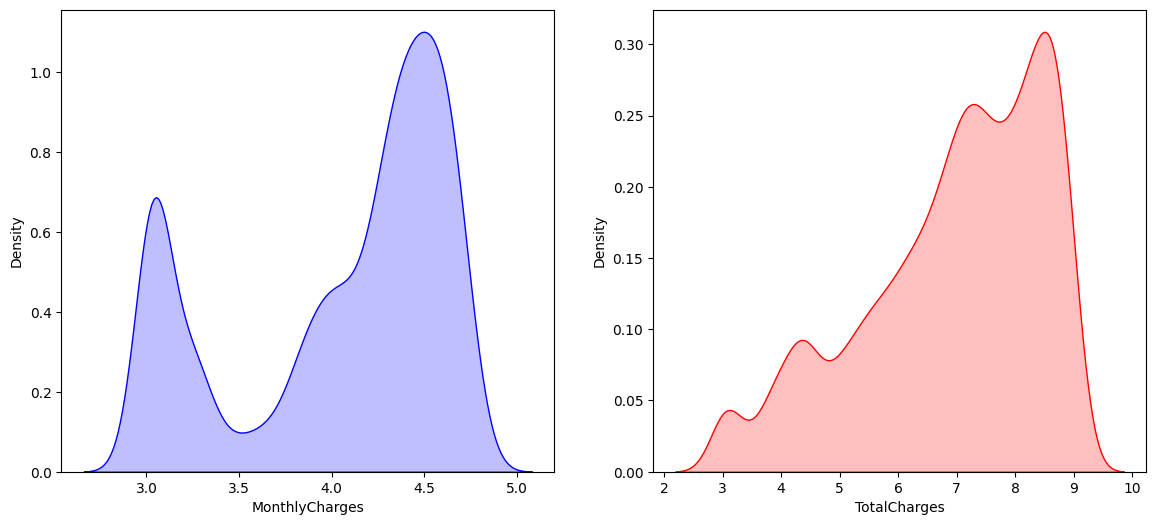

In [98]:
fig,axes = plt.subplots(1,2,figsize=(14,6))
sns.kdeplot(df["MonthlyCharges"],ax=axes[0],color="blue",shade=True)
sns.kdeplot(df["TotalCharges"], ax =axes[1], color="red", shade=True)

In [ ]:
## Train the Split

In [99]:
x= df.drop(columns=['Churn'])
y=df['Churn']

In [100]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
## Model Training

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#initilize and train model
model = LogisticRegression()
model.fit(x_train,y_train)

# get predictions
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [102]:
from sklearn.ensemble import RandomForestClassifier

#initilize and train model
model = RandomForestClassifier()
model.fit(x_train,y_train)

# get predictions
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [109]:
from catboost import CatBoostClassifier

#initilize and train model
model = CatBoostClassifier(verbose=False, )
model.fit(x_train,y_train,cat_features=cat_cols)

# get predictions
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



## Confusion Matrix

<Axes: >

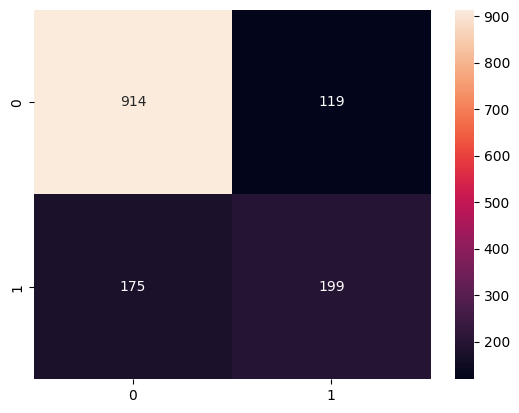

In [111]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')